## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
#Required modules
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
len(df)

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted == 1').user_id.nunique()/df['user_id'].nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
len(df[((df['group'] == 'treatment') != (df['landing_page'] == 'new_page'))])

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))]

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated('user_id', keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated('user_id', keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop_duplicates(['user_id'], keep = 'first')


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
len(df2.query('converted == 1'))/len(df2)

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df3 = df2.query('group == "control"')

len(df3.query('converted == 1'))/len(df3)








0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df4 = df2.query('group == "treatment"')

len(df4.query('converted == 1'))/len(df4)

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
len(df2.query('landing_page == "new_page"'))/len(df2)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**There is an almost equal chance of an individual receiving new page or an old page. This means the test is unbiased. Probability of an individual converting devoid of what page they recieve is only about 12%. While further tests are required to confirm results, probability of an individual converting is considerably low indicating that new treatment page may not succesully guarantee more convertions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis : p_new - p_old <= 0**

**Alternate Hypothesis : p_new - p_old > 0**

*This is a right tail test

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [31]:
p_new = len(df2.query('converted == 1'))/len(df2)
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [32]:
p_old = len(df2.query('converted == 1'))/len(df2)
p_old

0.11959708724499628

c. What is $n_{new}$?

In [33]:
n_new = len(df2.query('landing_page == "new_page"'))
n_new

145310

d. What is $n_{old}$?

In [34]:
n_old = len(df2.query('landing_page == "old_page"'))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([0,1], n_new, [1-p_new, p_new])


    

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([0,1], n_old, [1-p_old, p_old])



g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:

new_page_converted.mean() - old_page_converted.mean()

0.0021268088075641067

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [35]:
obs_diff = df2['converted'][df2['group'] == 'treatment'].mean() - df2['converted'][df2['group'] == 'control'].mean()

_p_diffs = []

for _ in range(10000):
    # 1st parameter dictates the choices you want.  In this case [1, 0]
    _p_new = np.random.choice([1, 0],n_new,replace = True,p = [p_new, 1-p_new]).mean()
    _p_old = np.random.choice([1, 0],n_old,replace = True,p = [p_old, 1-p_old]).mean()
    _p_diffs.append(_p_new - _p_old)
_p_diffs = np.array(_p_diffs)
null_vals = np.random.normal(0, _p_diffs.std(), _p_diffs.size)
print ("Proportion Greater : {}".format((null_vals > obs_diff).mean()))
    

Proportion Greater : 0.9122


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

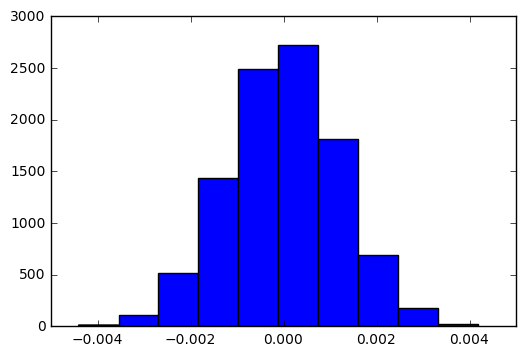

In [36]:
plt.hist(_p_diffs)
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

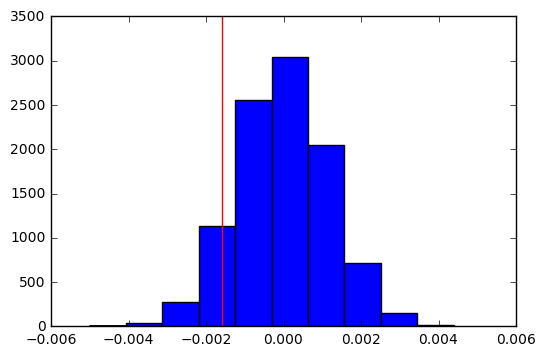

In [37]:
plt.hist(null_vals);

plt.axvline(x=obs_diff, color='red')
plt.show()



k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Under the null hypothesis where the conversion rates for both old page and new page is assumed to be the same, the above probability distribution plot shows the distribution of sample means obtained from the difference between converted new page and converted old page using the synthetically generated data of converted/not converted (0's and 1's) values. The red line shows the actual observed difference of converted new page and converted old page. Since we have established earlier that this is a right tail test (p_new <= p_old), the difference between old page and new page can be considered significant only if the red line above fell on the right extreme of the tail (upper tail critical region) in which case the resulting p-vale would be considerably less than the significant level 0.05. The red line here however falls on the left extreme portion of the tail indicating the probability of finding a sample data with significant difference between the old page and new page is quite low. In other words, p-value 0.83 calculated below suggest the chance of getting a sample data such as those in null distribution is 83%. Thus there is no sufficient evidence to reject null hypothesis and hence we fail to accept that there is significant difference between new page and the old page. **

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
#Get statsmodel module to perform statitical analysis
np.warnings.filterwarnings("ignore")
import statsmodels.api as sm


convert_old = len(df2.query("landing_page == 'old_page' and converted == 1"))
convert_new = len(df2.query("landing_page == 'new_page' and converted == 1"))
n_old_ = len(df2.query("landing_page == 'old_page'"))
n_new = len(df2.query("landing_page == 'new_page'"))




m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [39]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
from scipy.stats import norm

#Divide p-value by 2 since this a one tail test (upper tail test) 
#Since this is a right tail test p-value for right tail is 1-p-value on left tail
z_score,1-p_value/2


(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**z-score is a test statitic for normally distributed data. Rejection region for an upper tail test in a Z test for a significance level of 0.05 is 1.645. In order to reject the null hypothsis, the resulting z-score value should be greater than the z-critical value (1.645). In this experiment, the z-score value is less than the critical value indicating we fail to reject the null hypothesis. The p-value also agrees with this z-test results. A higher p-value (> than siginificance level 0.05) indicates the that the test is not significant and that there is no evidence to disapprove null hypothesis. These results are in agreement with the findings in parts j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since the outcome variable is either yes or no (converted/not converted), Logistic Regression shoule be used.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
df2['intercept'] = 1
df2['ab_page'] = np.where(df2['group'] == 'treatment', 1,0)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [41]:
predictortVar = ['intercept', 'ab_page']
logReg = sm.Logit(df2['converted'], df2[predictortVar])
answer = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
answer.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2018-05-08 20:44 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The null hypothesis in the regression model is that there is no significant difference in conversion based on which page a customer receives and so the weight falls on the alternate hypothesis to prove otherwise. Null hypothesis defined in Part II assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%. In Part II, we calculate p-values from a probability distribution. While regression use probability distrbution to describe the data, p-values may vary because regressions are about fitting a straight line. Having said this, both regression and results from probability distribution still should produce the same conclusions. As in this case, both tests indicate there is no statistical difference between the two pages.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**The Akaike Information Criteria (AIC) and Bayesian Information Criteria (BIC) is fairly high. While both these criteria follow different assumptions, they penalize number of parameters and help in choosing the best predictor subsets. A model is considered to be a fair represention of a true model when AIC/BIC values are lower. This suggest that it is a good idea to explore other predictors that may influence to produce an efficient regression model. Timestamp seems like a good predictor to assess if a certain time period influences the indiviual to convert or not convert. Additionally, assessing if day of the week influnces the individuals to convert or not also seems worthy to explore. Adding additional terms could sometimes lead to complex model. However criteria like AIC/BIC, Mean Squared Error (MSE) can be used to assess if having more than one perdictors improves the model or not. **

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [44]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [45]:
### Create the necessary dummy variables

df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new.drop('CA', axis=1, inplace=True)

df_new[['new_page', 'old_page']] = pd.get_dummies(df_new['landing_page'])
df_new.head()

# Using CA and old page as baseline
predictorVar = ['intercept', 'new_page', 'US', 'UK']
logReg2 = sm.Logit(df_new['converted'], df_new[predictorVar])
answer2 = logReg2.fit()

answer2.summary2()




Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


/Users/varsha/anaconda/lib/python3.5/site-packages/numpy/lib/utils.py:99: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.
  warnings.warn(depdoc, DeprecationWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2018-05-08 20:44 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
new_page      -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

**From the summary table above, we calculate the odds ratio. Odds ratio represents the odds of an outcome occuring (in this case converted) given an exposure (in this case new page) as compared to the odds of the occurance of the outcome in the absence of that exposure.**

In [46]:
odds = np.exp(answer2.params[1:])
odds

new_page    0.985168
US          1.041599
UK          1.051944
dtype: float64

**The odds ratio for new page is 0.98 (approximately equal to 1). This means that there is almost an equal chance for an individual converting or not converting.
For each unit increase in US, new page 1.04 times likey holding all else constants
For each unit increase in UK, new page 1.05 times likey holding all else constants**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
### Fit Your Linear Model And Obtain the Results

df_new['US_new'] = df_new.new_page * df_new.US
df_new['UK_new'] = df_new.new_page * df_new.UK

predictorVar = ['intercept', 'new_page','US', 'UK', 'US_new', 'UK_new' ]

logReg3 = sm.Logit(df_new['converted'], df_new[predictorVar])
answer3 = logReg3.fit()

answer3.summary2()



Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


/Users/varsha/anaconda/lib/python3.5/site-packages/numpy/lib/utils.py:99: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.
  warnings.warn(depdoc, DeprecationWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2018-05-08 20:44 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
new_page      -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US_new         0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK_new         0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

In [48]:
odds = np.exp(answer3.params[1:])
odds

new_page    0.934776
US          1.017682
UK          1.011854
US_new      1.048001
UK_new      1.081428
dtype: float64

**Above results indicate that the model does not improve in any manner. Adding the interactions suggest that the odds of converting for US and new page is 1.04 times likely when compared to CA and new page.**

**Similarly the odds of converting for US and new page is 1.08 times likely when compared to CA and new page.**

**The p-values for all coefficients are above 0.05 indicating that no one predictor is significantly better than the other in predicting the outcome.**

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
predictorVar = ['intercept', 'new_page','US', 'UK', 'US_new', 'UK_new' ]
X=df_new[predictorVar]
y = df_new['converted']
#Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('True Positives: {}, False Positives: {}, False Negatives: {}'.format(tp, fp, fn))

True Positives: 0, False Positives: 0, False Negatives: 10558


**The confusion matrix above shows zero true positives and false positives and has a very high value for false negatives. This means the predictor variables estimates no conversion even though the actual data indicated conversion. A probabilty matrix was created to confirm the results from the confusion matrix. Below is the probabilty of Converting/Not converting for the first 10 rows of the predicted outcome. The matrix indicate that there was nearly 90% chance of estimating no convertions each time by the model. The model has zero precision. The predictor variables are not a good indicator to produce accurate outcome.**

In [50]:
y_pred = logreg.predict_proba(X_test)

y_pred_df = pd.DataFrame(y_pred)

y_pred_df.rename(columns={0 : 'Not Converted', 1 : 'Converted'}).head(10)

,Not Converted,Converted
0,0.882512,0.117488
1,0.880197,0.119803
2,0.882512,0.117488
3,0.880197,0.119803
4,0.882512,0.117488
5,0.880489,0.119511
6,0.877861,0.122139
7,0.880489,0.119511
8,0.877861,0.122139
9,0.882512,0.117488


**As an additional analysis, timescale was used to extract day of the week to see if weekdays or weekends influenced conversions.**

In [51]:
#Get datetime column from timestamp
df_new['datetime'] = pd.to_datetime(df_new['timestamp'])

#Get day of the week in interger format
df_new['day'] = df_new['datetime'].dt.dayofweek

#Categorize as either weekdar or weekend and get dummy variables
df_new['ab_day'] = np.where(df_new['day'] <=5, 'Weekday','Weekend')

df_new[['Weekday', 'Weekend']] = pd.get_dummies(df_new['ab_day'])
df_new.head()

#Perform regression to check the outcome for converting keeping weekday as baseline

predictorVar = ['intercept',  'Weekend']

logReg4 = sm.Logit(df_new['converted'], df_new[predictorVar])
answer4 = logReg4.fit()

answer4.summary2()



Optimization terminated successfully.
         Current function value: 0.366120
         Iterations 6


/Users/varsha/anaconda/lib/python3.5/site-packages/numpy/lib/utils.py:99: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.
  warnings.warn(depdoc, DeprecationWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.5159
Date:               2018-05-08 20:45 BIC:              212802.6752
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.45717    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9946    0.0062  -324.2483  0.0000  -2.0066  -1.9825
Weekend      -0.0124    0.0167    -0.7427  0.4577  -0.0450   0.0203
==================================================================

"""

In [52]:
o = np.exp(-0.0124)
print('Odds Ratio: {:.2f}'.format(o))

Odds Ratio: 0.99


**AIC/BIC values are still high indicating the weekday/weekend predictors do not improve the model in any way. Also the odds ratio from the regression test indicate that the odds of converting on a weekday or on a weekend is the same!**

## Extra Credit : Knowing that Part iii is a two-tailed test and Part ii is a one-tail test, can you convert the p-values between each other?

**The p-value in two tail is essentially 2*p-value. So in Part III section d which is a two tail test, we have a p-value of 0.19. In order to get p-value for one tail test, the resulting p-value is simply divided by 2. The default p-value is for the left tail. To get p-value for right tail, the method is 1-p-value of left tail.**

In [53]:
p_val_twotail = 0.19
p_val_lefttail = p_val_twotail/2

p_val_rightttail = 1 - p_val_lefttail
p_val_rightttail


0.905

## References

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

https://analytics4all.org/2016/05/11/python-logistic-regression/

https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob